### Práctica: Respuestas de un circuito eléctrico de segundo orden.

**Objetivo:** Modelar un circuito eléctrico de segundo orden mediante el análisis de mallas para obtener su función de transferencia. Simular la respuesta del sistema ante una entrada escalón, analizando y comparando los casos de respuesta subamortiguada, críticamente amortiguada y sobreamortiguada a través de la modificación de los parámetros del circuito y la ubicación de los polos del sistema.


---

#### Paso 1: Planteamiento del sistema.

Para nuestro análisis, utilizaremos un circuito RLC de dos mallas. La entrada será el voltaje de la fuente, $V_{in}(t)$, y la salida será el voltaje en la resistencia $R_2$, que denotaremos como $V_{out}(t)$.

![Diagrama del circuito eléctrico.](../assets/images/P_2_02_Diagrama.png)

*Figura 1. Diagrama eléctrico del circuito.*

---

#### Paso 2: Obtención de la Función de Transferencia.

Realizaremos el análisis de mallas directamente en el dominio de Laplace, asumiendo condiciones iniciales iguales a cero. Las impedancias de los componentes son $R_1$, $R_2$, $sL$ y $\frac{1}{sC}$.

Aplicamos la Ley de Voltajes de Kirchhoff (LVK) a cada malla:

**Ecuación de la Malla 1:**
$$ V_{in}(s) = (R_1 + \frac{1}{sC})I_1(s) - \frac{1}{sC}I_2(s) \quad \dots (1) $$

**Ecuación de la Malla 2:**
$$ 0 = -\frac{1}{sC}I_1(s) + (R_2 + sL + \frac{1}{sC})I_2(s) \quad \dots (2) $$

La salida del sistema es $V_{out}(s) = R_2 I_2(s)$. Nuestro objetivo es encontrar la función de transferencia $G(s) = \frac{V_{out}(s)}{V_{in}(s)}$. 

Para ello, necesitamos resolver el sistema de ecuaciones para $I_2(s)$. Utilizando la regla de Cramer, obtenemos:
$$ I_2(s) = \frac{\begin{vmatrix} R_1 + \frac{1}{sC} & V_{in}(s) \\ -\frac{1}{sC} & 0 \end{vmatrix}}{\begin{vmatrix} R_1 + \frac{1}{sC} & -\frac{1}{sC} \\ -\frac{1}{sC} & R_2 + sL + \frac{1}{sC} \end{vmatrix}} = \frac{\frac{1}{sC}V_{in}(s)}{(R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2} $$

Desarrollando el denominador:
$$ (R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2$$
$$ = R_1R_2 + sL R_1 + \frac{R_1}{sC} + \frac{R_2}{sC} + \frac{L}{C} + \frac{1}{s^2 C^2} - \frac{1}{s^2 C^2}$$
$$ = sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC} $$

Sustituyendo el denominador en la expresión de $I_2(s)$:
$$ I_2(s) = \frac{\frac{1}{sC}V_{in}(s)}{sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC}} $$
$$ I_2(s) = \frac{V_{in}(s)}{sC (sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC})} $$
$$ I_2(s) = \frac{V_{in}(s)}{s^2LCR_1 + s(R_1R_2C+L) + (R_1+R_2)} $$

Como $V_{out}(s) = R_2 I_2(s)$, la función de transferencia final es:
$$ G(s) = \frac{V_{out}(s)}{V_{in}(s)} = \frac{R_2}{s^2(LCR_1) + s(L+R_1R_2C) + (R_1+R_2)} $$

El **polinomio característico** del sistema (el denominador) es:
$$ \Delta = s^2 (LCR_1) + s(L+R_1R_2C) + (R_1 + R_2) = 0 $$

Las raíces de este polinomio, que son los polos del sistema, determinan la naturaleza de la respuesta transitoria.


---

#### Paso 3: Simulación y Análisis en Python.

Consideremos los valores del sistema:

$R_1 = 2 \, \Omega$

$R_2 = 2 \, \Omega$

$C = 1 \, F$

$L_{subamortiguada} = 4 \, H$


Ahora, vamos a simular el sistema para un conjunto de parámetros que resultan en una **respuesta submortiguada**. Un sistema subamortiguado tiene un par de números complejos conjugados con partes reales negativas.


##### *Análisis de las raíces para el caso subamortiguado:*

Con los valores, el polinomio característico es:
$$ s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
$$ s^2(4 \cdot 1 \cdot 2) + s(4 + 2 \cdot 2 \cdot 1) + (2 + 2) = 0 $$
$$ 8 s^2 + 8s + 4 = 0 $$
$$ s^2 + s + \frac{1}{2} = 0 $$

Las raíces (polos) se calculan con la fórmula cuadrática:
$$ s = \frac{-b \pm \sqrt{b^2-4ac}}{2a} $$
$$ s = \frac{-1 \pm \sqrt{1^2 - 4 \cdot 1 \cdot \frac{1}{2}}}{2 \cdot 1} $$
$$ s = - \frac{1}{2} \pm \frac{\sqrt{-1}}{2} $$

Por lo que se obtiene:
$$ s = - \frac{1}{2} \pm \frac{1}{2}j $$

Como las raíces son complejos conjugados con parte real negativa, la respuesta es **subamortiguada**.

#### Paso 3.a) Crear la Función de Transferencia.

In [18]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros del circuito para una respuesta SUBAMORTIGUADA. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
L = 4      # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_subamortiguado = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia es:")
print(sistema_subamortiguado)

La Función de Transferencia es:
<TransferFunction>: sys[25]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         2
  ---------------
  8 s^2 + 8 s + 4


#### Paso 3.b) Visualizar el mapa de polos y ceros.


Las raíces de s (polos) son:
[-0.5+0.5j -0.5-0.5j]


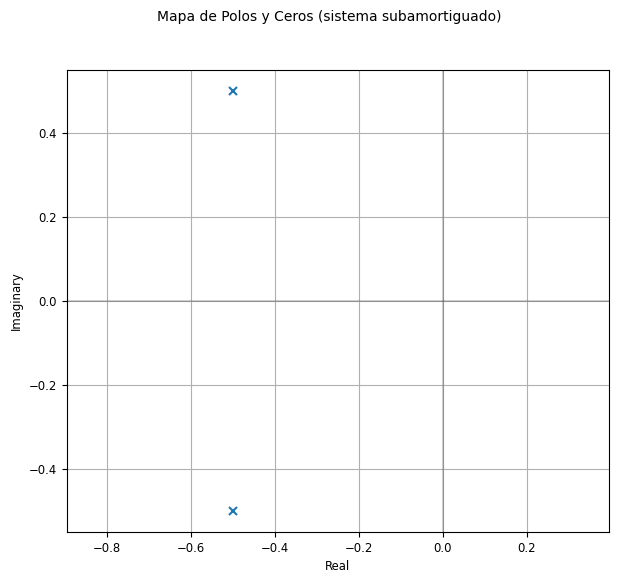

In [19]:
# --- Indicar las raíces de s (Polos del sistema). ---
# Para un sistema subamortiguado, esperamos complejos conjugados con parte real negativa.
# Usamos la función ct.poles() para obtener las raíces del denominador.
polos = ct.poles(sistema_subamortiguado)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_subamortiguado, title='Mapa de Polos y Ceros (sistema subamortiguado)')
plt.grid(True)
plt.show()


#### Paso 3.c) Graficar la respuesta del sistema.


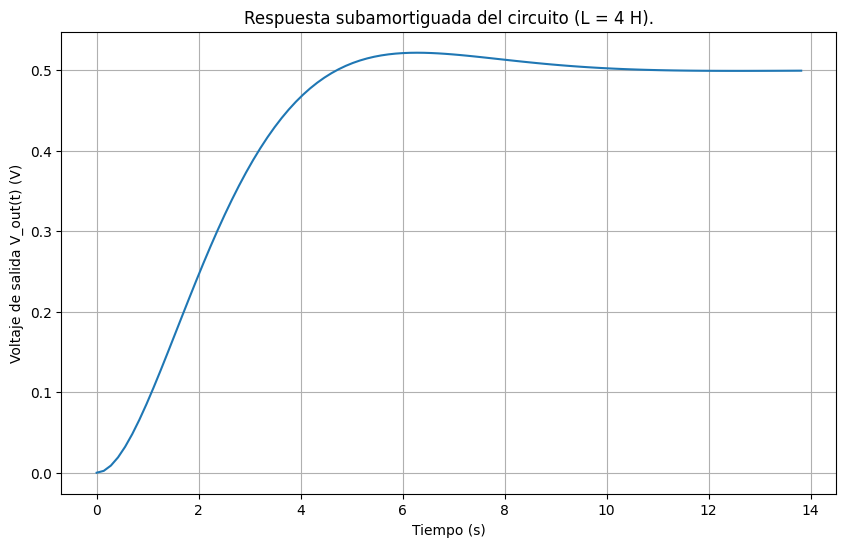

In [20]:
# --- Simulación de la respuesta al escalón unitario. ---
# Calculamos la respuesta del sistema a una entrada de 1 V.
# t es el vector de tiempo y vout_subamortiguado es el vector de la salida V_out(t).
t, vout_subamortiguado = ct.step_response(sistema_subamortiguado)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t, vout_subamortiguado)
plt.title('Respuesta subamortiguada del circuito (L = 4 H).')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()


#### Ejercicio propuesto. Análisis de las respuestas críticamente amortiguada y sobreamortiguada.

Ahora que hemos analizado y simulado el caso subamortiguado, tu tarea es encontrar los valores de $L$ que producen las respuestas críticamente amortiguada y sobreamortiguada.

**Instrucciones:**

1.  **Respuesta Críticamente Amortiguada:**
    Recuerde que la ecuación característica del sistema es:
    $$ \Delta = s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
    
    Manteniendo $R_1 = 2 \, \Omega$, $R_2 = 2 \, \Omega$ y $C = 1 \, F$, determina analíticamente 
    el valor de $L$ que hace que el discriminante del polinomio característico ($b^2-4ac$) sea igual a cero. 
    $$ \implies (L + R_1 R_2 C)^2 - 4 \cdot (LCR_1) \cdot (R_1 + R_2) = 0 $$

    Esto resultará en dos polos negativos, reales e iguales.
    * Muestra tu cálculo en una celda de Markdown.
    * En una celda de código, utiliza ese valor de $L$ para crear la nueva función de transferencia; obtener y visualizar el mapa de polos y ceros; y generar la gráfica de su respuesta al escalón.
    
2.  **Respuesta Sobreamortiguada:**
    * Elige un valor de $L$ adecuado (valor propuesto con base en el análisis del valor para el caso críticamente amortiguado y el que se propuso al inicio para el caso subamortiguado).
    * Demuestra analíticamente que, con este nuevo valor de $L$, las raíces son dos números reales, distintos y negativos. Incluye este análisis en una celda de Markdown.
    * En una celda de código, utiliza ese valor de $L$ para crear la nueva función de transferencia; obtener y visualizar el mapa de polos y ceros; y generar la gráfica de su respuesta al escalón.

3.  **Gráfica comparativa:**
    * En una celda final, crea un único script que grafique las tres respuestas (subamortiguada, críticamente amortiguada y sobreamortiguada) en la misma figura.
    * Usa `plt.legend()` para identificar claramente cada curva. Esto te permitirá visualizar directamente cómo el cambio en un solo elemento afecta la dinámica del sistema.

**Para determinar la L critica amortiguada tomamos el polinomio caracteristico e igualamos a 0**

![Procedimiento para determinar L](../assets/images/ProcedimientoL.jpg)

**Ahora para el L sobreamortiguada**
![Diagrama del circuito eléctrico.](../assets/images/ComprobacionL.jpg)

**Las graficas correspondientes a estos valores son los siguientes:**

In [21]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros del circuito para una respuesta SUBAMORTIGUADA. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
Lcrit = 23.313      # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [Lcrit*C*R1, (Lcrit + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_crit = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia es:")
print(sistema_crit)

La Función de Transferencia es:
<TransferFunction>: sys[28]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

             2
  -----------------------
  46.63 s^2 + 27.31 s + 4


Las raíces de s (polos) son:
[-0.29289452+0.00135776j -0.29289452-0.00135776j]
[]


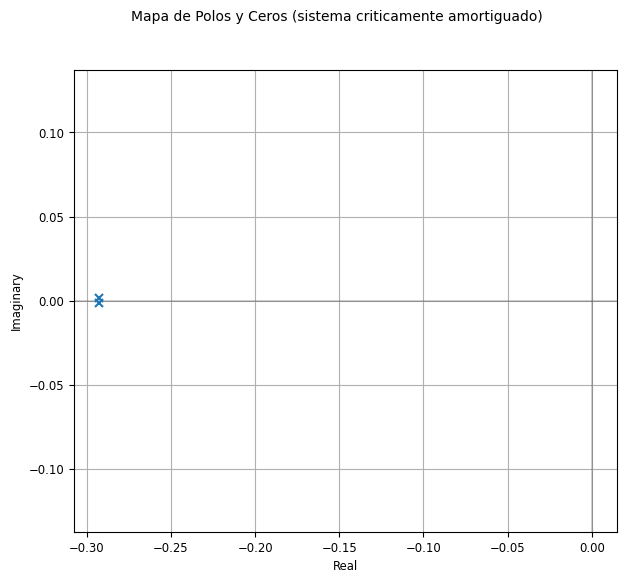

In [22]:
# --- Indicar las raíces de s (Polos del sistema). ---
# Para un sistema subamortiguado, esperamos complejos conjugados con parte real negativa.
# Usamos la función ct.poles() para obtener las raíces del denominador.
poloscrit = ct.poles(sistema_crit)
zeroscrit = ct.zeros(sistema_crit)
# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(poloscrit)
print(zeroscrit)
# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_crit, title='Mapa de Polos y Ceros (sistema criticamente amortiguado)')
plt.grid(True)
plt.show()

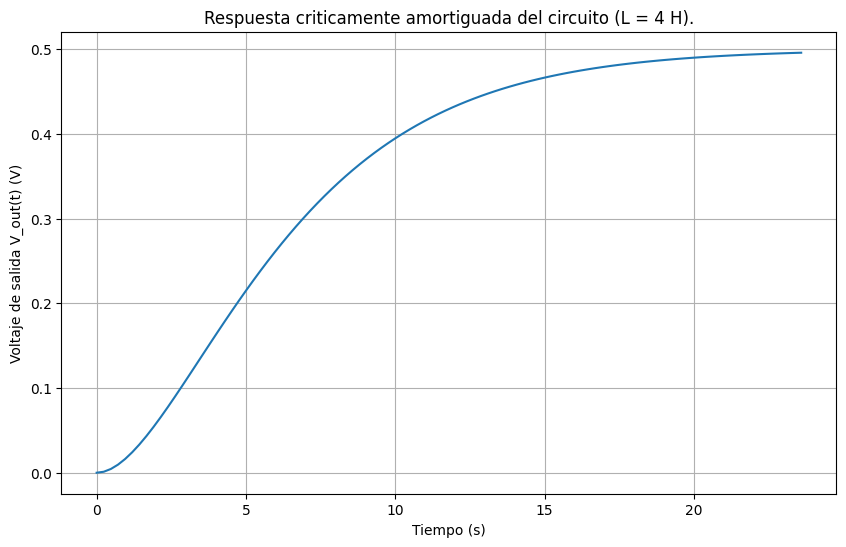

In [23]:
# --- Simulación de la respuesta al escalón unitario. ---
# Calculamos la respuesta del sistema a una entrada de 1 V.
# t es el vector de tiempo y vout_crit es el vector de la salida V_out(t).
t, vout_crit = ct.step_response(sistema_crit)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t, vout_crit)
plt.title('Respuesta criticamente amortiguada del circuito (L = 4 H).')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()

**Ahora para la respuesta sobreamortiguada**

In [24]:

# --- Parámetros del circuito para una respuesta SUBAMORTIGUADA. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
Lsobre = 30      # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [Lsobre*C*R1, (Lsobre + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_sobre = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia es:")
print(sistema_sobre)

La Función de Transferencia es:
<TransferFunction>: sys[31]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

          2
  -----------------
  60 s^2 + 34 s + 4


Las raíces de s (polos) son:
[-0.4       +0.j -0.16666667+0.j]
[]


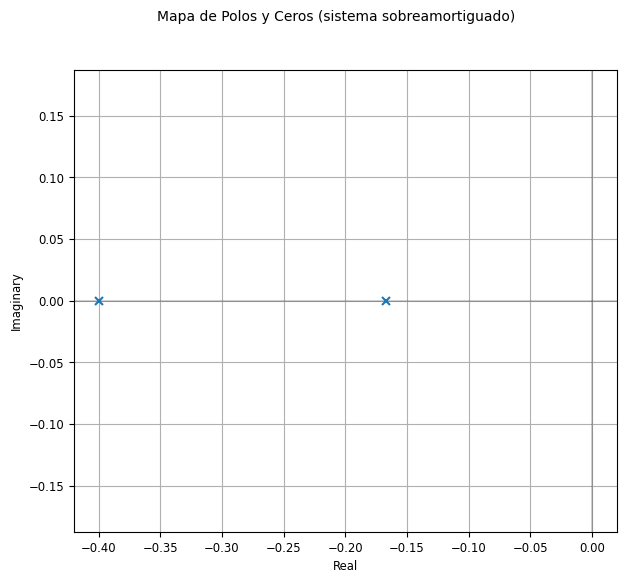

In [25]:
# --- Indicar las raíces de s (Polos del sistema). ---
# Para un sistema subamortiguado, esperamos complejos conjugados con parte real negativa.
# Usamos la función ct.poles() para obtener las raíces del denominador.
polossob = ct.poles(sistema_sobre)
zerossob = ct.zeros(sistema_sobre)
# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polossob)
print(zerossob)
# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_sobre, title='Mapa de Polos y Ceros (sistema sobreamortiguado)')
plt.grid(True)
plt.show()

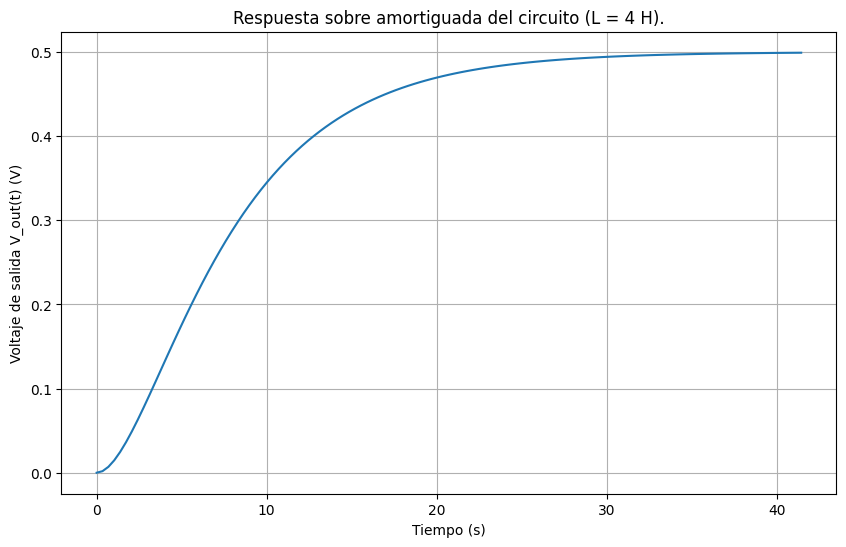

In [26]:
# --- Simulación de la respuesta al escalón unitario. ---
# Calculamos la respuesta del sistema a una entrada de 1 V.
# t es el vector de tiempo y vout_subamortiguado es el vector de la salida V_out(t).
t, vout_sob = ct.step_response(sistema_sobre)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t, vout_sob)
plt.title('Respuesta sobre amortiguada del circuito (L = 4 H).')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()

#### Grafica para comparar las tres funciones 

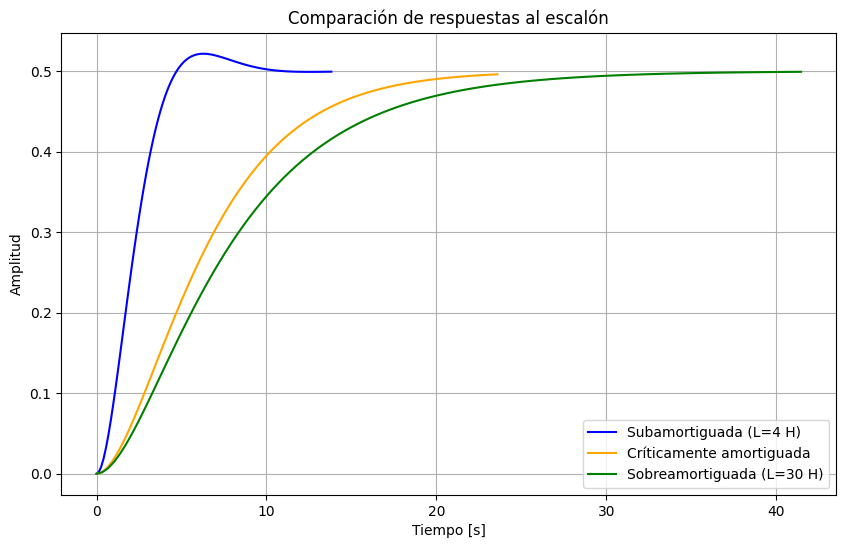

In [27]:
# --- Parámetros del circuito para una respuesta SUBAMORTIGUADA. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
L = 4      # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_subamortiguado = ct.tf(num, den)
t1, vout_subamortiguado = ct.step_response(sistema_subamortiguado)
# --- Parámetros del circuito para una respuesta criticamente amortiguado. ---
Lcrit = 23.313      # Henrios
# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [Lcrit*C*R1, (Lcrit + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_crit = ct.tf(num, den)
t2, vout_crit = ct.step_response(sistema_crit)
# --- Parámetros del circuito para una respuesta SOBREAMORTIGUADA. ---
Lsobre = 30      # Henrios
# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [Lsobre*C*R1, (Lsobre + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_sobre = ct.tf(num, den)
t3, vout_sob = ct.step_response(sistema_sobre)

# Gráfica comparativa
plt.figure(figsize=(10,6))
plt.plot(t1, vout_subamortiguado, label="Subamortiguada (L=4 H)", color='blue')
plt.plot(t2, vout_crit, label="Críticamente amortiguada", color='orange')
plt.plot(t3, vout_sob, label="Sobreamortiguada (L=30 H)", color='green')
plt.title("Comparación de respuestas al escalón")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()
plt.show()
